# Import Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import nltk
import textwrap   # Wraps the single paragraph in text, and returns a single string containing the wrapped paragraph

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer


In [84]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Read the dataset

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
%cd /content/drive/MyDrive/NLP/Assigment-04

/content/drive/MyDrive/NLP/Assigment-04


In [87]:
df = pd.read_csv('npr.csv')

In [88]:
df.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [89]:
df.shape

(11992, 1)

# Instantiate Count Vectorizer and fit to the features

In [90]:
vectorizer = CountVectorizer(stop_words = 'english') # since model itself based on wordcount, therefore we are not using TFIDF

In [91]:
X = vectorizer.fit_transform(df['Article'])

In [92]:
X # This is document by word Matrix

<11992x95985 sparse matrix of type '<class 'numpy.int64'>'
	with 3074596 stored elements in Compressed Sparse Row format>

# Instantiate LDA

In [93]:
lda_model = LatentDirichletAllocation(n_components=10, random_state = 42) # default: n_components = 10
# Number of components means number of topics. Changing random state will change the results

nmf_model = NMF(
    n_components=10, # default: 10
    beta_loss="kullback-leibler", # using KL Loss based on the paper recommendation
    solver='mu',  # mu is multiplicative update, we need to define it when we use KL Loss
    random_state = 42,
)

In [94]:
lda_model.fit(X)

LatentDirichletAllocation(random_state=42)

In [95]:
nmf_model.fit(X)

NMF(beta_loss='kullback-leibler', n_components=10, random_state=42, solver='mu')

## The following code is copied from the scikit learn documention. This function plots the bar plot of each topic. It will show the top 10 words for each topic. This function will give topic by words matrix

In [96]:
def plot_top_words(model, feature_names, n_top_words=10, title="LDA"):
  fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle(title, fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

# Get the total words OR Vocab of the dataset

In [97]:
feature_names = vectorizer.get_feature_names_out()

In [98]:
len(feature_names)

95985

# Apply the function

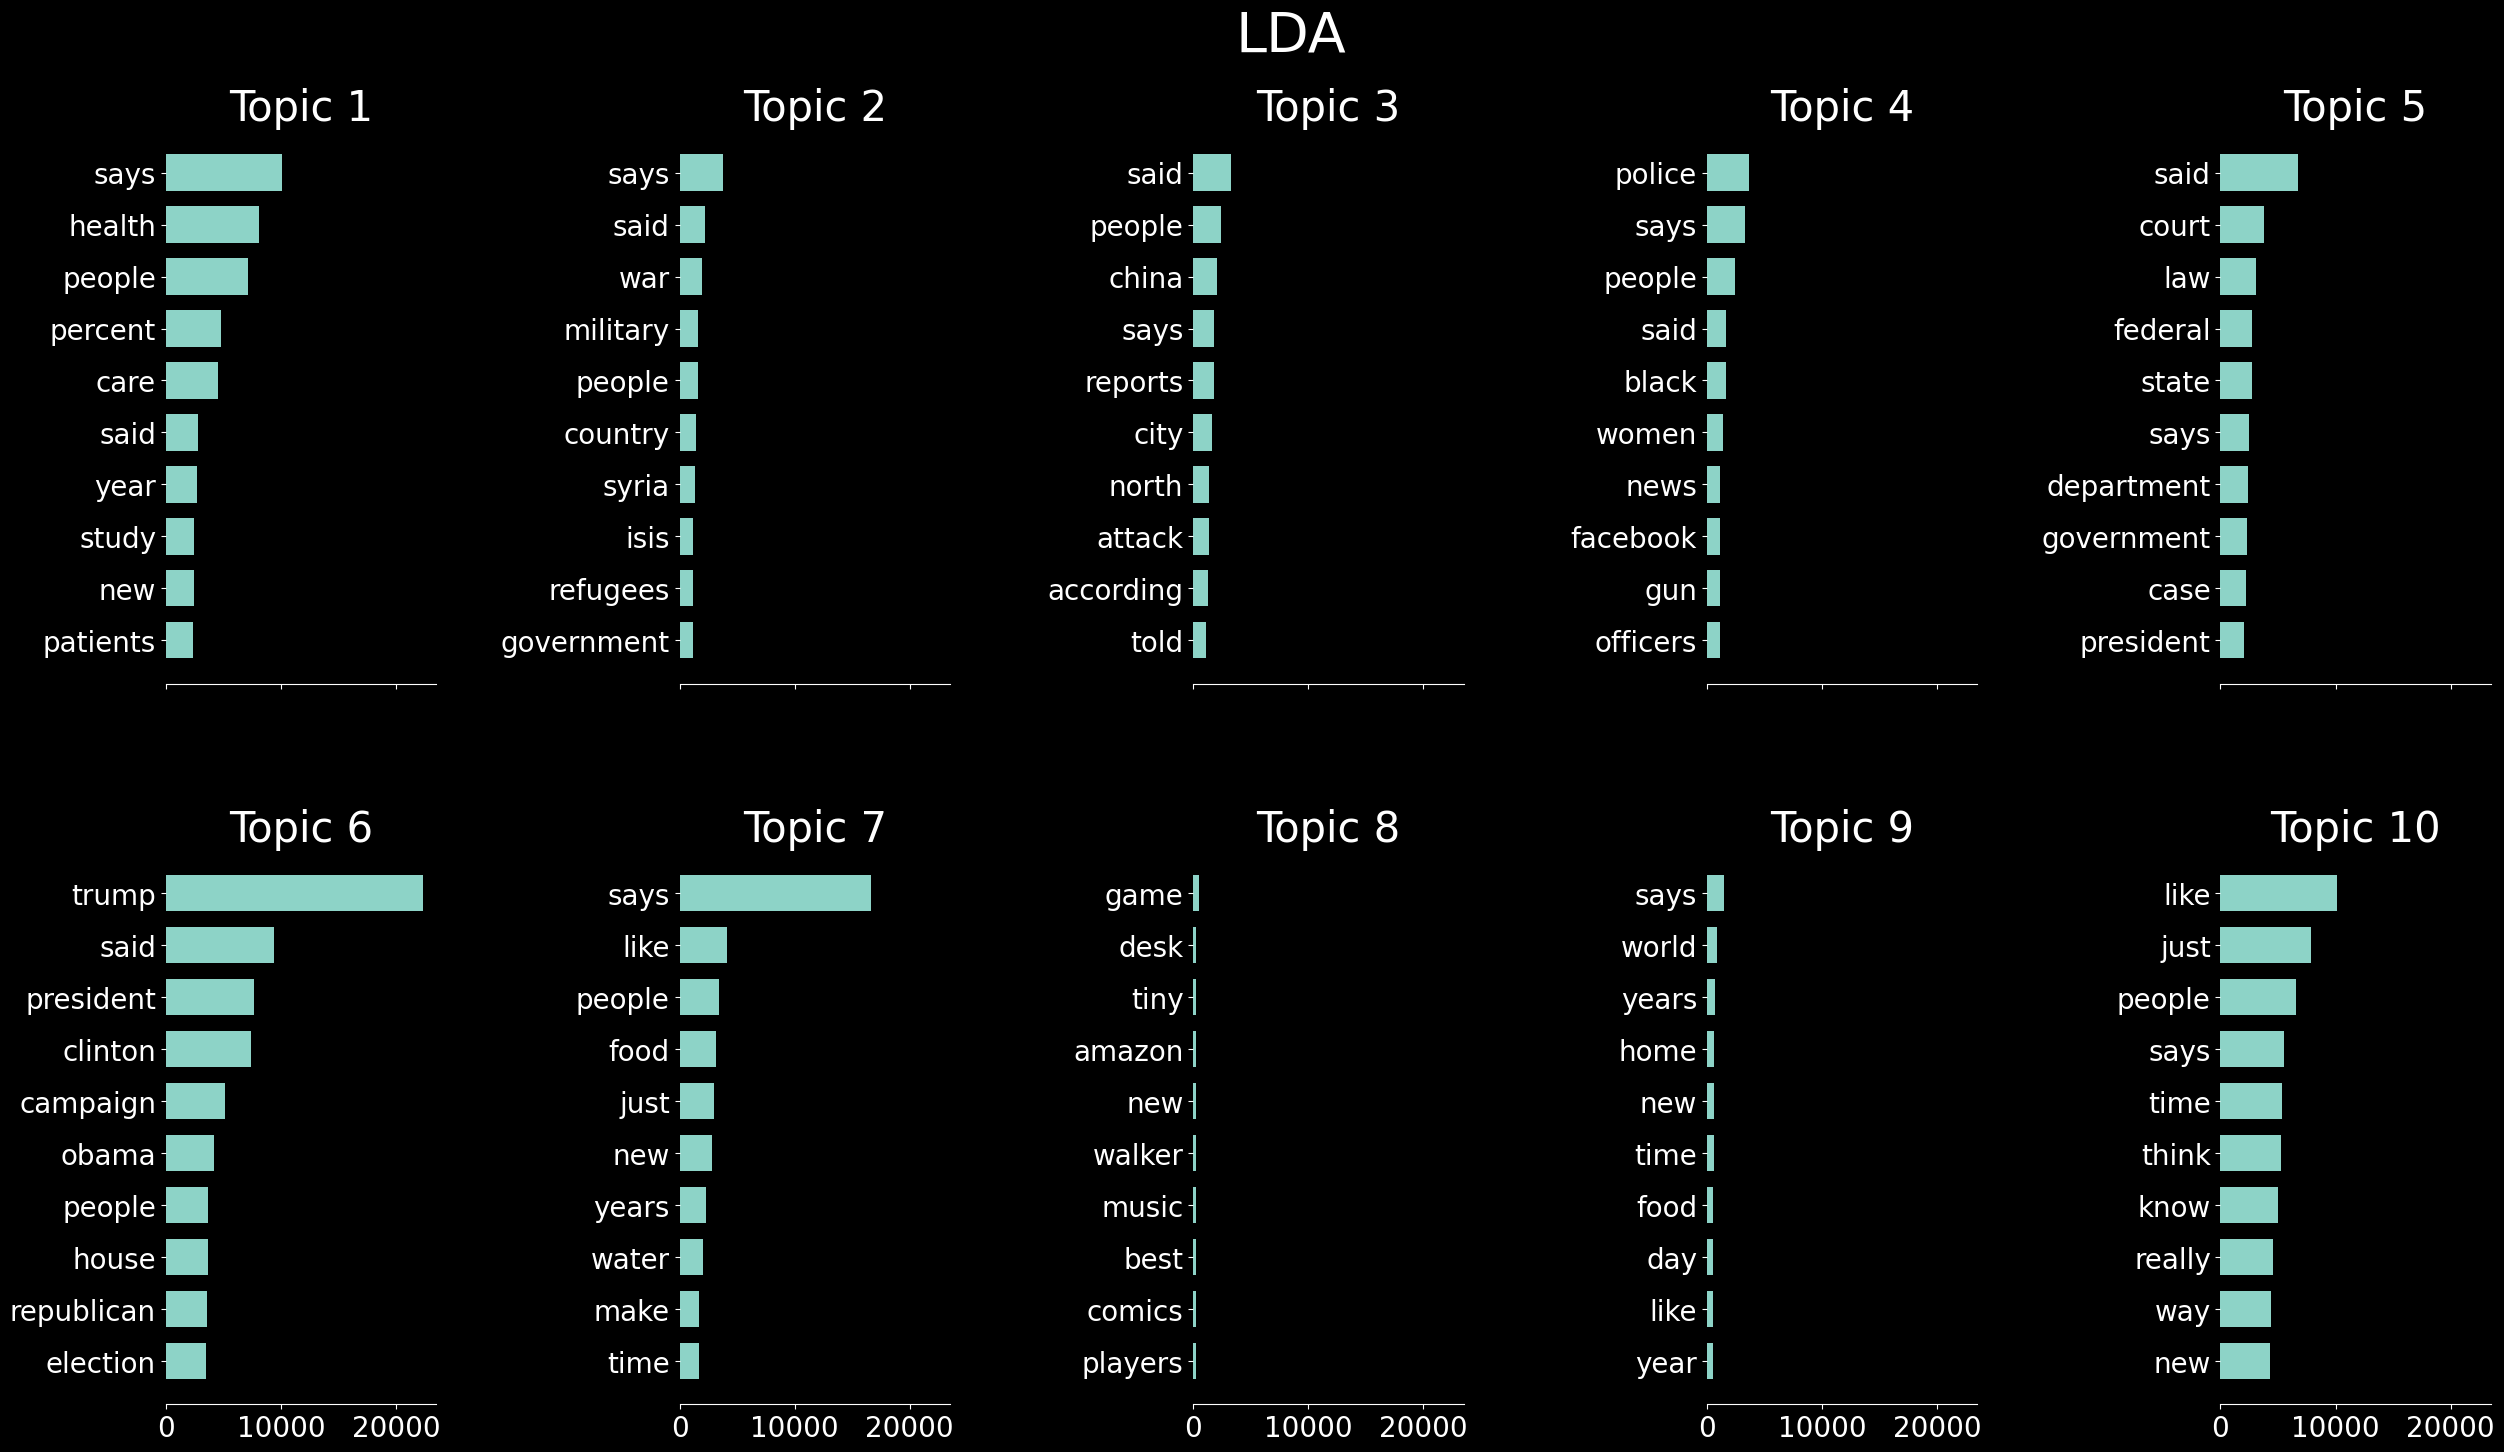

In [99]:
plot_top_words(lda_model, feature_names)

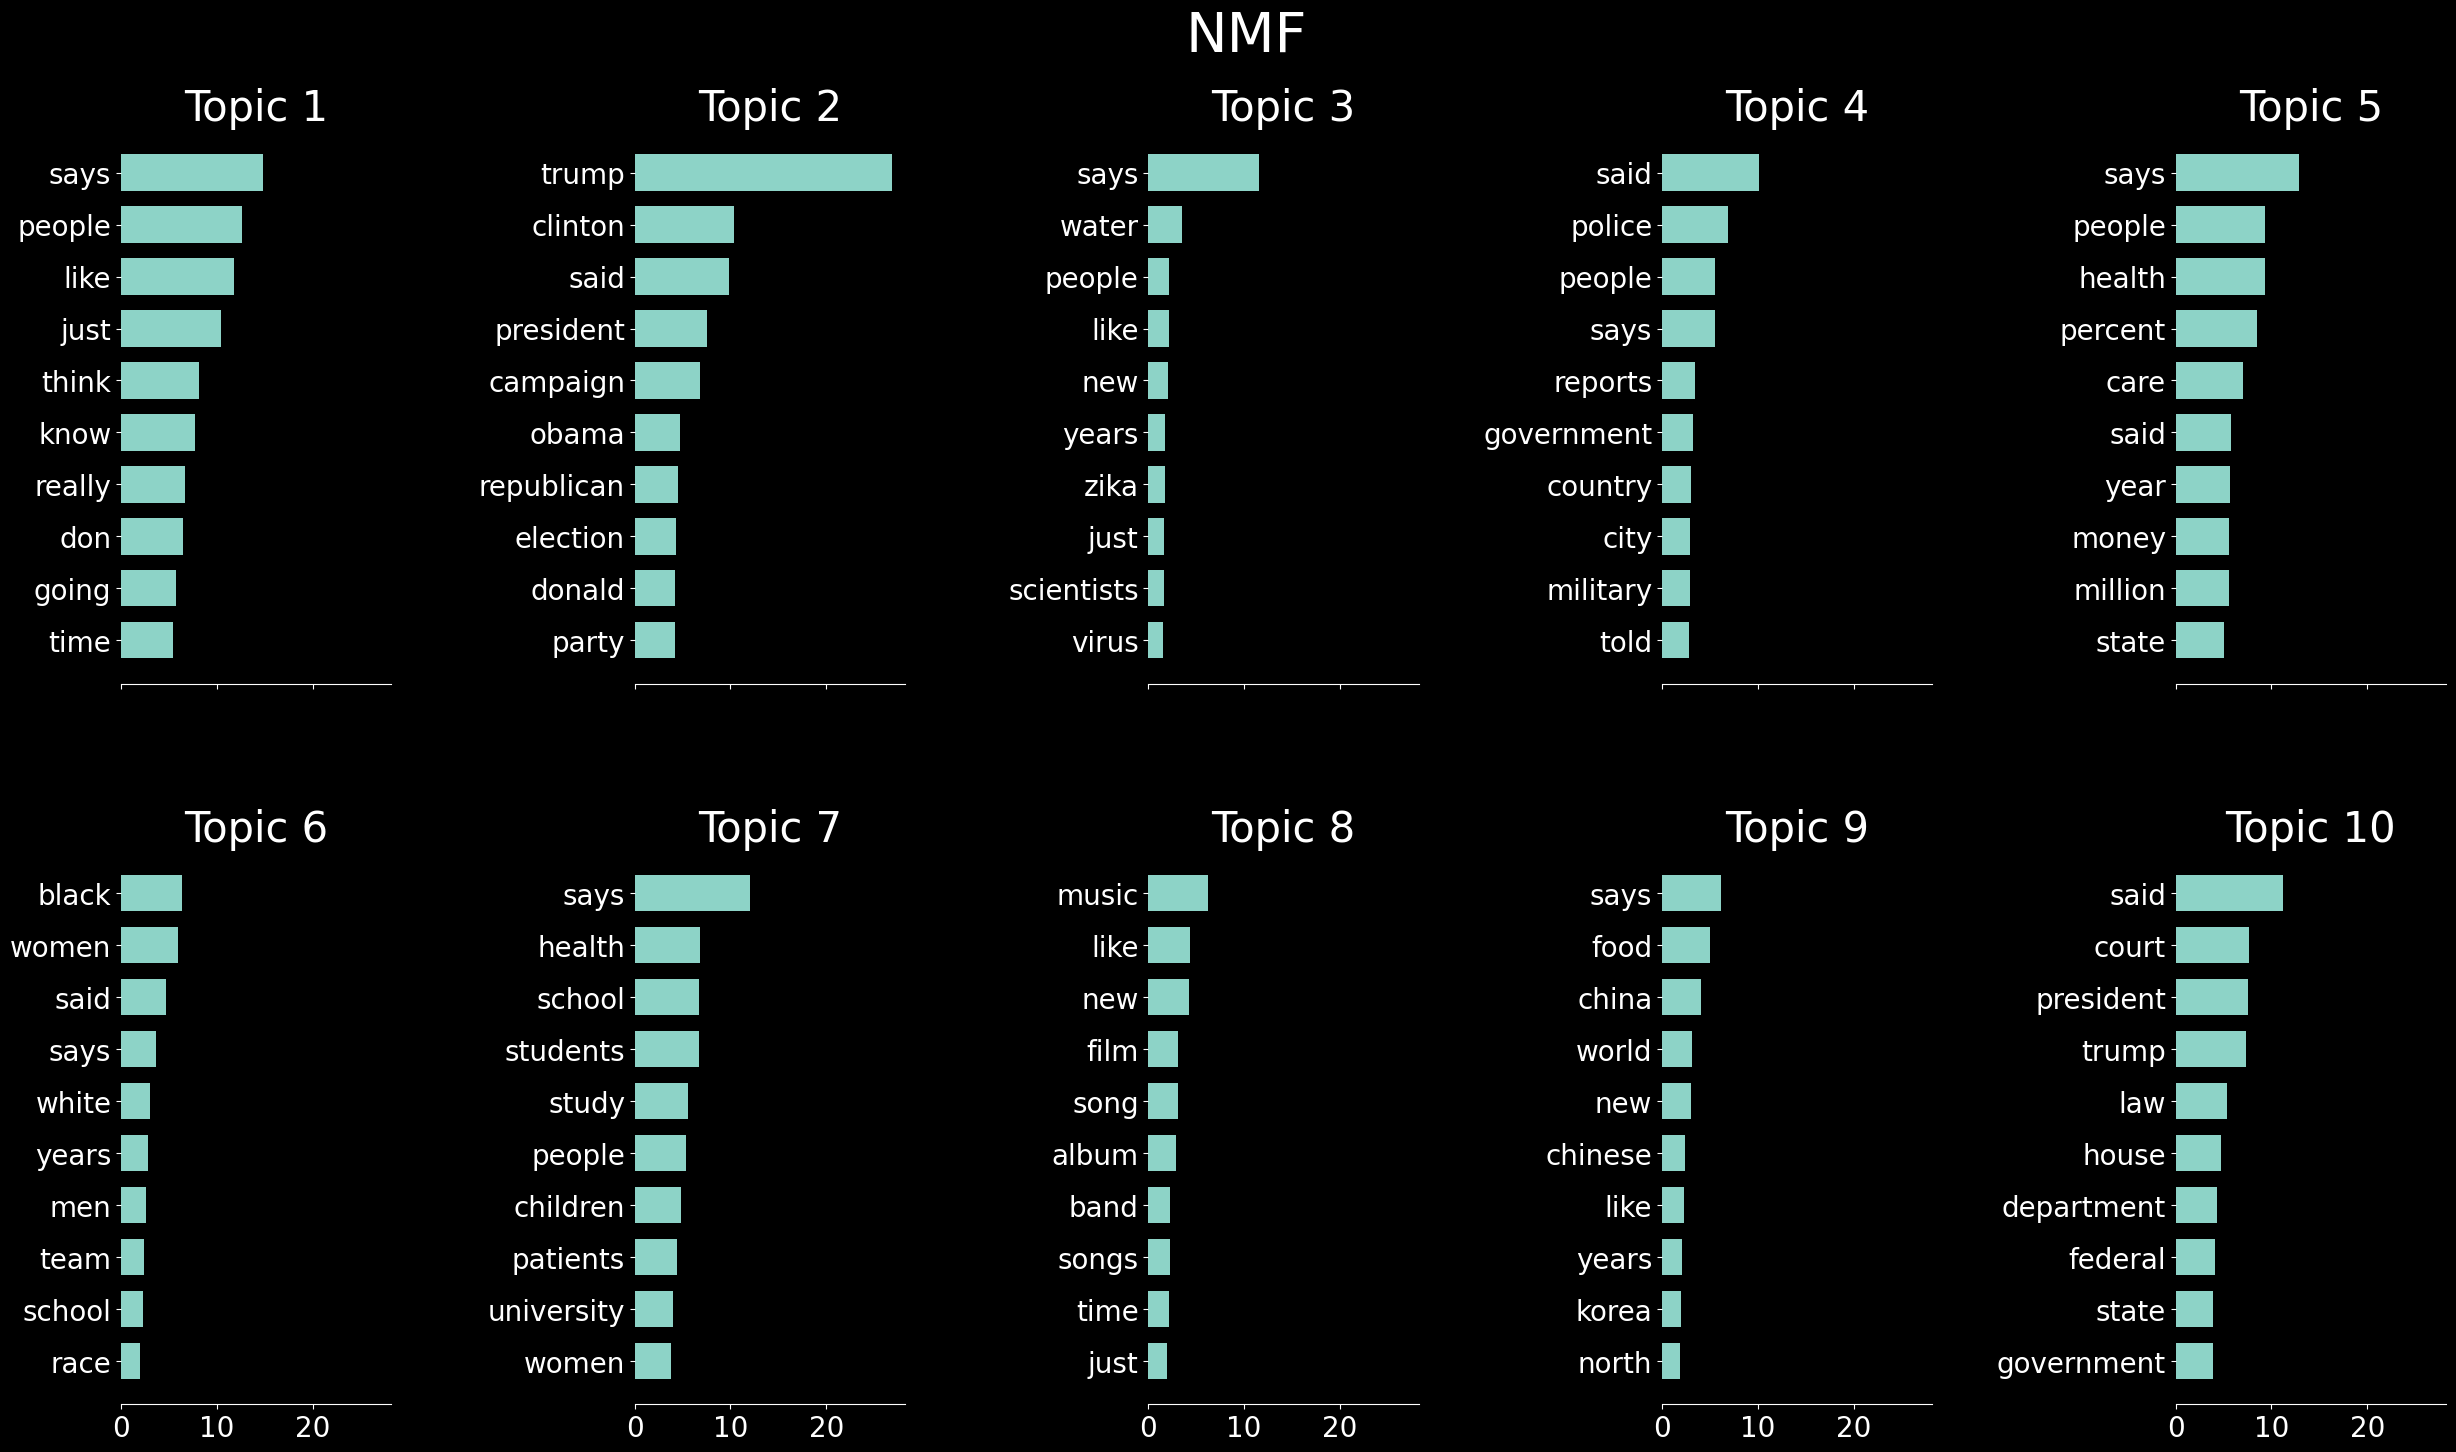

In [100]:
plot_top_words(nmf_model, feature_names,10,"NMF")

## Words "says" and "said" could part of the stopwords

# Now we want to see documents by topics matrix.

In [101]:
lda_Z = lda_model.transform(X) # Z is the hidden variable which shows distribution over topics.
nmf_Z = nmf_model.transform(X)

In [102]:
def get_topic_idx(data):
    max_values = []
    num_samples = data.shape[0]

    # Iterate through each sample
    for sample in range(num_samples):
        # Get the values in the current column from all rows
        column_values = data[sample,:]
        max_index = np.argmax(column_values)
        max_values.append(max_index + 1)

    return max_values

In [103]:
lda_pred = get_topic_idx(lda_Z)
nmf_pred = get_topic_idx(nmf_Z)
lda_pred[:5]

[6, 6, 6, 5, 10]

In [104]:
final_df = pd.DataFrame({'Article': df['Article'], 'LDA Topic': lda_pred, 'NMF Topic': nmf_pred})
final_df.head(10)

,Article,LDA Topic,NMF Topic
0,"In the Washington of 2016, even when the polic...",6,10
1,Donald Trump has used Twitter — his prefe...,6,2
2,Donald Trump is unabashedly praising Russian...,6,2
3,"Updated at 2:50 p. m. ET, Russian President Vl...",5,10
4,"From photography, illustration and video, to d...",10,4
5,I did not want to join yoga class. I hated tho...,7,7
6,With a who has publicly supported the debunk...,1,7
7,"I was standing by the airport exit, debating w...",7,1
8,"If movies were trying to be more realistic, pe...",7,3
9,"Eighteen years ago, on New Year’s Eve, David F...",7,3
